<a href="https://colab.research.google.com/github/vaggani-purushotham/waterpotability/blob/main/waterpotability.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import missingno as msno

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix

In [2]:
df = pd.read_csv('/content/water_potability.csv')
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [3]:
df.shape

(3276, 10)

In [4]:
df.isnull().sum()

,0
ph,491
Hardness,0
Solids,0
Chloramines,0
Sulfate,781
Conductivity,0
Organic_carbon,0
Trihalomethanes,162
Turbidity,0
Potability,0


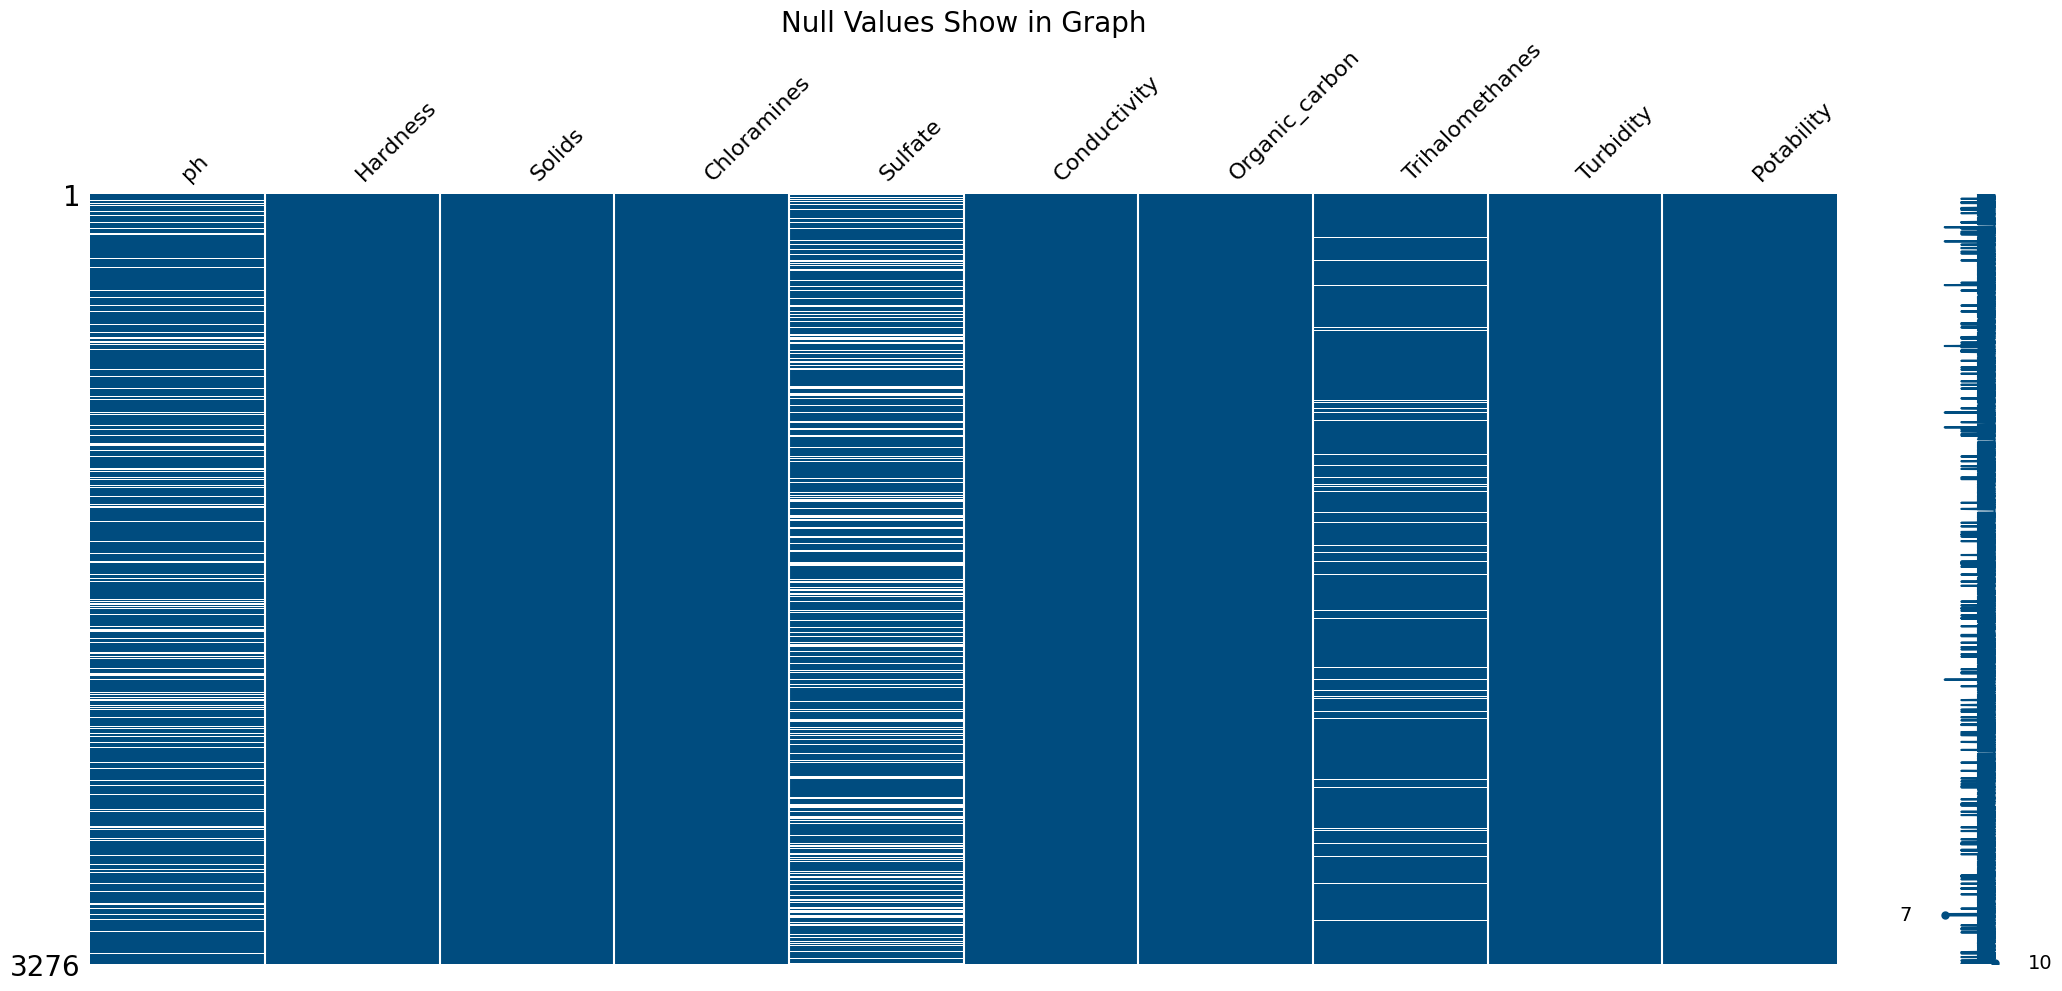

In [5]:
msno.matrix(df, color=(0,0.3,0.5))
plt.title('Null Values Show in Graph', fontsize=20)
plt.show()

In [6]:
df.duplicated().sum()

np.int64(0)

In [7]:
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [9]:
df.dtypes

,0
ph,float64
Hardness,float64
Solids,float64
Chloramines,float64
Sulfate,float64
Conductivity,float64
Organic_carbon,float64
Trihalomethanes,float64
Turbidity,float64
Potability,int64


In [10]:
df.corr()['Potability']

,Potability
ph,-0.003556
Hardness,-0.013837
Solids,0.033743
Chloramines,0.023779
Sulfate,-0.023577
Conductivity,-0.008128
Organic_carbon,-0.030001
Trihalomethanes,0.007130
Turbidity,0.001581
Potability,1.000000


In [11]:
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


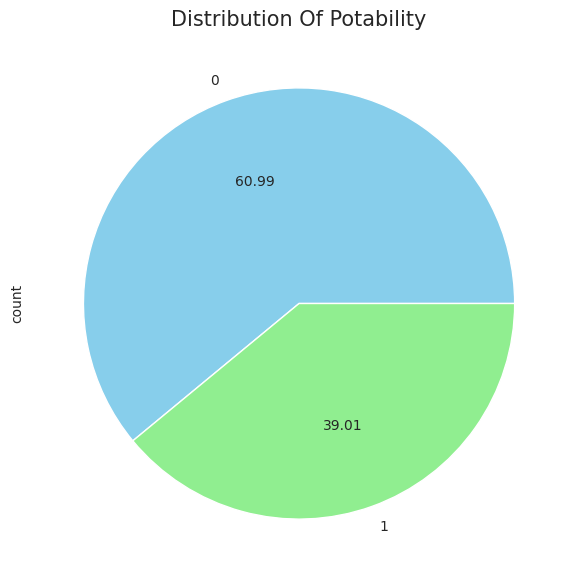

In [12]:
sns.set_style('darkgrid')

plt.figure(figsize=(10,7))
df['Potability'].value_counts().plot(kind='pie', colors=['skyblue', 'lightgreen'],
                                    autopct='%.2f')
plt.title('Distribution Of Potability', fontsize=15)
plt.show()

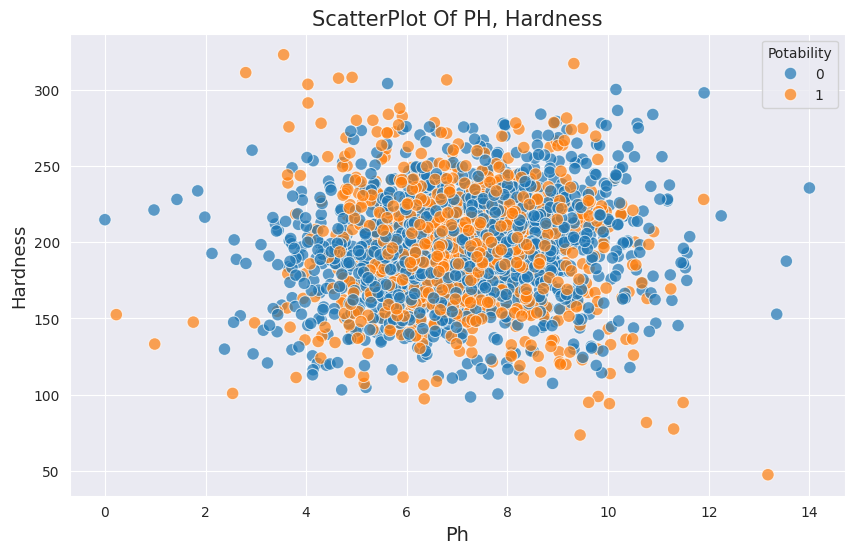

In [13]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=df['ph'], y=df['Hardness'], s=80,alpha=0.7, hue=df['Potability'])
plt.title('ScatterPlot Of PH, Hardness', fontsize=15)
plt.xlabel('Ph', fontsize=14)
plt.ylabel('Hardness', fontsize=13)

plt.show()

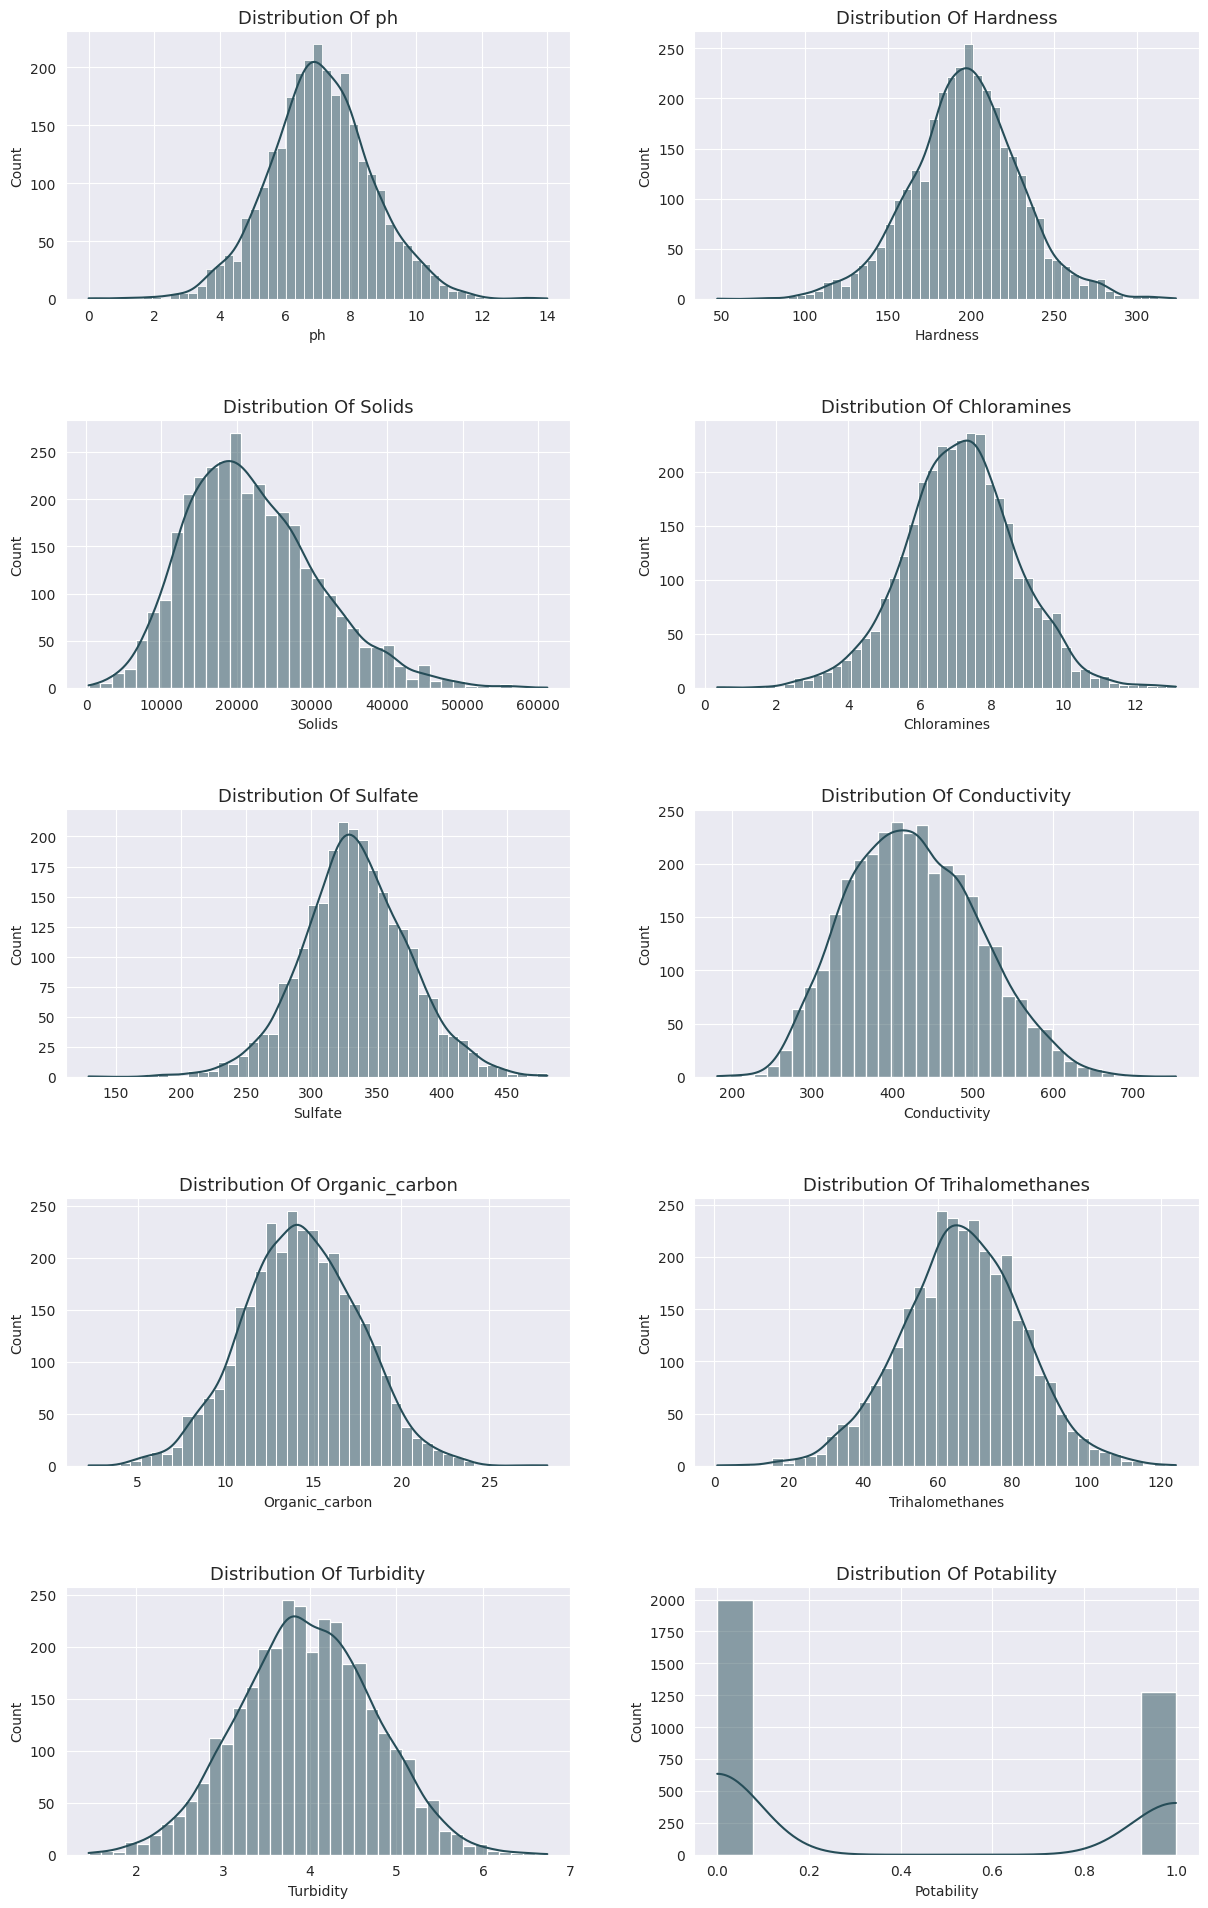

In [14]:
plt.figure(figsize=(13,20))
for k, cols in enumerate(df):
    plt.subplot(5,2, k+1)
    sns.histplot(x=cols,data=df, color='#264D58', kde=True)
    plt.title(f"Distribution Of {cols}", fontsize=13)
    plt.tight_layout(pad=4.0)

plt.show()

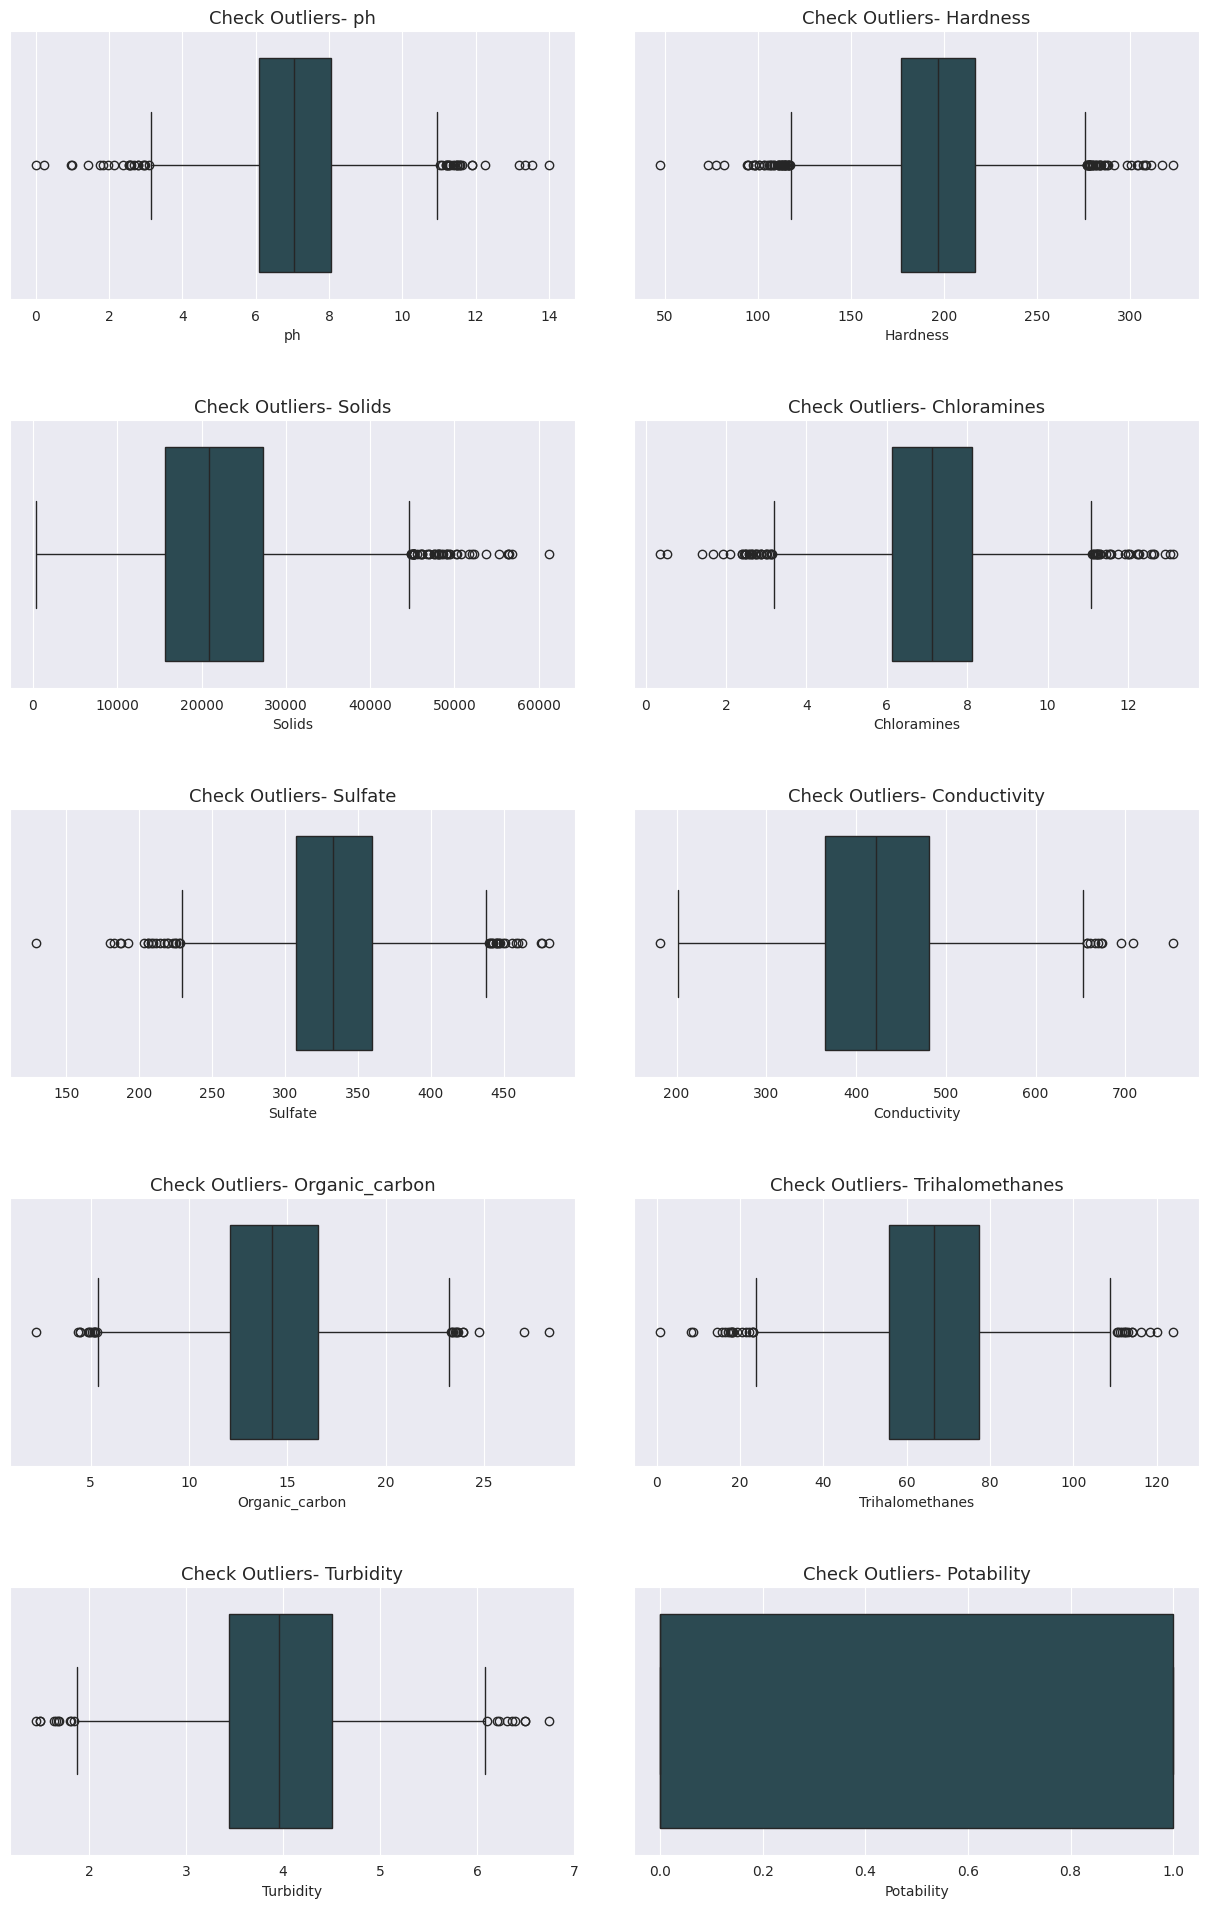

In [15]:
plt.figure(figsize=(13,20))
for k, cols in enumerate(df):
    plt.subplot(5,2, k+1)
    sns.boxplot(x=cols,data=df, color='#264D58')
    plt.title(f"Check Outliers- {cols}", fontsize=13)
    plt.tight_layout(pad=4.0)

plt.show()

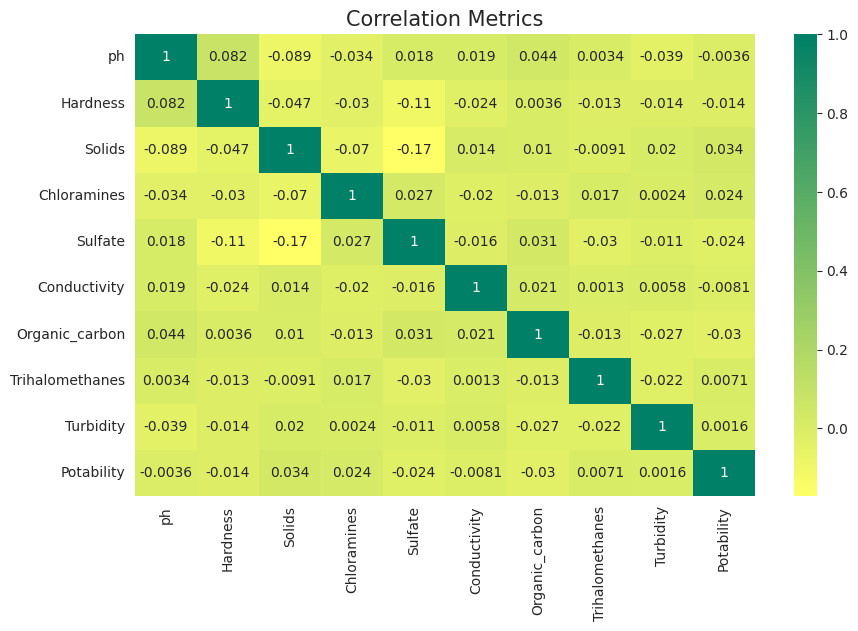

In [16]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap='summer_r')
plt.title('Correlation Metrics', fontsize=15)
plt.show()

Filling missing values

In [17]:
df['ph'].fillna(value=df['ph'].median(),inplace=True)
df['Sulfate'].fillna(value=df['Sulfate'].median(),inplace=True)
df['Trihalomethanes'].fillna(value=df['Trihalomethanes'].median(),inplace=True)

In [18]:
X= df.drop(columns='Potability', axis=1)
y= df['Potability']

In [19]:
X_train,X_test, y_train,y_test = train_test_split(X,y , test_size=0.3)
print(f"X_train Shape: {X_train.shape}")
print(f"Y_train Shape: {y_train.shape}")
print(f"X_test Shape: {X_test.shape}")
print(f"y_test Shape: {y_test.shape}")

X_train Shape: (2293, 9)
Y_train Shape: (2293,)
X_test Shape: (983, 9)
y_test Shape: (983,)


Scaling Data

In [20]:
scaler = StandardScaler()
scaler.fit(X_train, X_test)
X_train_scaled  = scaler.transform(X_train)
X_test_scaled  = scaler.transform(X_test)